In [1]:
# ===== Include all needed libraries / packages =====


import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# ===== Import list of frequencies & dataframes from csv files =====


# Specify the directory where the CSV files are
directory = './output_csv_data/'

# Create a list of frequencies (int)
list_of_freq_mhz = np.arange(139, 146)

# Specify a list of all CSV filenames in the directory
csv_files = []
for freq_mhz in list_of_freq_mhz:
    csv_files = np.append(csv_files, 'data_' + str(freq_mhz) + 'mhz.csv')


# Create a list of DataFrames
list_of_dfs = [pd.read_csv(os.path.join(directory, f)) for f in csv_files]

In [5]:
# ===== Calculate CDF for Gain RHCP =====

cdf_x_min_r = -15
cdf_x_max_r = 0.5
cdf_x_axis = np.linspace(cdf_x_min_r, cdf_x_max_r, int((cdf_x_max_r - cdf_x_min_r) * 10 + 1))
# cdf_y_axis = np.zeros(cdf_x_axis.shape[0], dtype=int)

list_cdf_y_axis_row = len(list_of_dfs)
list_cdf_y_axis_col = len(cdf_x_axis)
list_cdf_y_axis = np.empty((list_cdf_y_axis_row, list_cdf_y_axis_col))

for index, df in enumerate(list_of_dfs):
    cdf_y_axis_row = np.zeros(list_cdf_y_axis_col)
    for index2, x_val in enumerate(cdf_x_axis):
        cdf_y_axis_row[index2] += df['Weight'][df['Gain_RHCP_Weight'] >= x_val].sum()

    cdf_y_axis_row = cdf_y_axis_row / np.sum(df.Weight)
    list_cdf_y_axis[index] = cdf_y_axis_row

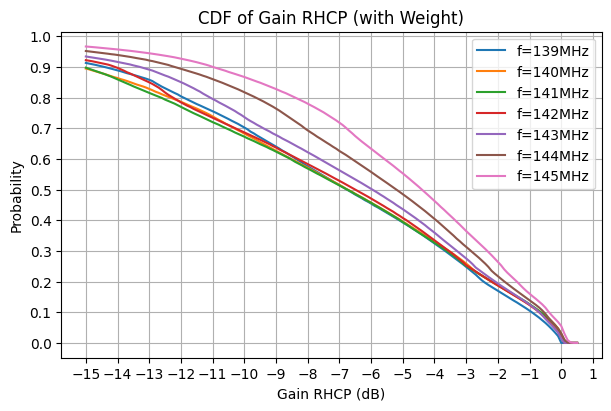

In [6]:
# ===== Plotting =====

%matplotlib inline

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4), layout='constrained')

for index, freq_mhz in enumerate(list_of_freq_mhz):
    ax.plot(cdf_x_axis, list_cdf_y_axis[index], label='f='+str(freq_mhz)+'MHz')    

ax.set_xticks(np.arange(min(cdf_x_axis), max(cdf_x_axis)+1, 1))
ax.set_yticks(np.arange(0, 1.1, 0.1))
ax.set_xlabel('Gain RHCP (dB)')
ax.set_ylabel('Probability')
ax.set_title("CDF of Gain RHCP (with Weight)")
ax.grid(True)
ax.legend()

plt.savefig(("output_plot/cdf_gain_rhcp_weight.pdf"), format='pdf', dpi=600)

plt.show()